In [1]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
plt.set_cmap(plt.cm.Paired) # 色設定

In [2]:
# 境界線を引く関数の定義

def plotBoundary(X, clf, mesh=True, boundary=True, type='predict'):

    # plot range
    x_min = min(X[:,0])
    x_max = max(X[:,0])
    y_min = min(X[:,1])
    y_max = max(X[:,1])

    # visualizing decision function
    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j] # make a grid
    
    if type == 'predict':
        Z = clf.predict(np.c_[XX.ravel(), YY.ravel()])
    elif type == 'probability':
        Z = np.exp(clf.predict_log_proba(np.c_[XX.ravel(), YY.ravel()]))[:, 1]
    else:
        Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])
    
    Z = Z.reshape(XX.shape) # just reshape

    if mesh:
        if type == 'predict':
            plt.pcolormesh(XX, YY, Z, zorder=-10) # paint in 2 colors, if Z > 0 or not
        else:
            plt.pcolormesh(XX, YY, Z, zorder=-10, cmap=plt.cm.bwr)
            plt.colorbar()

    if boundary:
        level = [0]
        if type == "probability":
            level = [0.5]
        plt.contour(XX, YY, Z, 
                    colors='k', linestyles='-', levels=level)

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

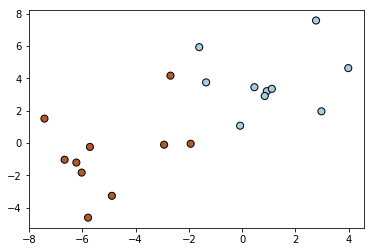

In [3]:

from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=20, # 20個生成
                  n_features=2, # 2次元
                  centers=2,    # クラスタ中心2個
                  cluster_std = 2, # クラスタの大きさ（標準偏差）
                  random_state=3   # 乱数種（再現用）
                 )

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolors='k'); # 2次元散布図でプロット

In [4]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state=8)
clf.max_depth = 1

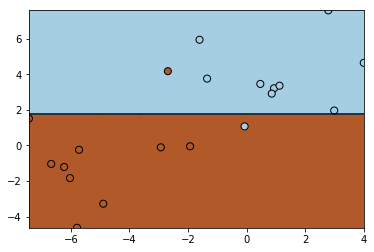

In [5]:
clf.n_estimators=1

clf.fit(X,y)
plt.scatter(X[:, 0], X[:, 1], marker='o', s=50, c=y, edgecolors='k') # 2次元散布図でプロット
plotBoundary(X, clf)

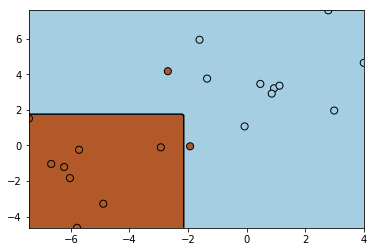

In [6]:
clf.n_estimators=2

clf.fit(X,y)
plt.scatter(X[:, 0], X[:, 1], marker='o', s=50, c=y, edgecolors='k') # 2次元散布図でプロット
plotBoundary(X, clf)

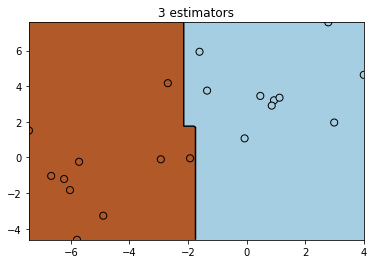

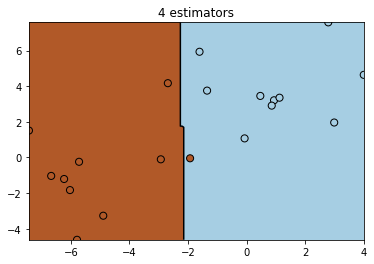

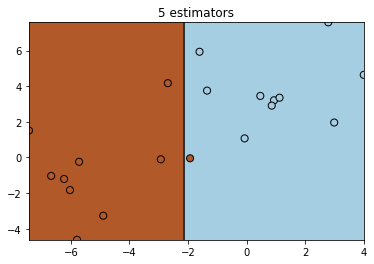

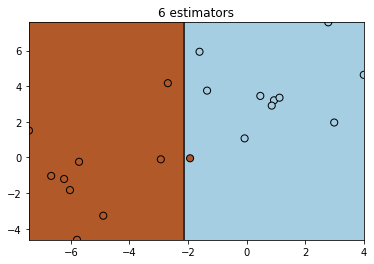

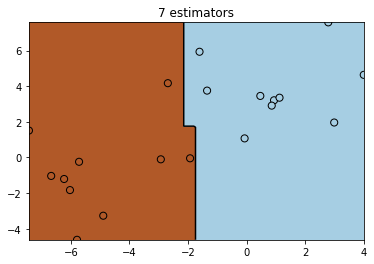

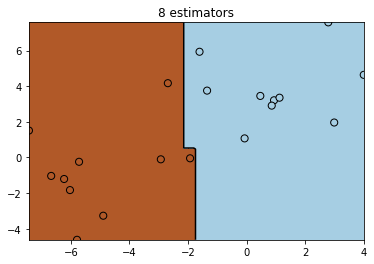

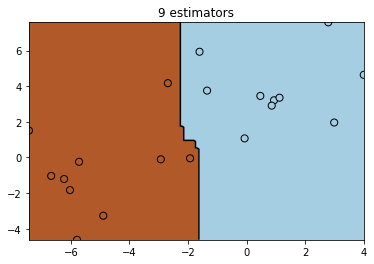

In [7]:
for i in range(3,10):
    clf.n_estimators = i
    clf.fit(X,y)
    plt.scatter(X[:, 0], X[:, 1], marker='o', s=50, c=y, edgecolors='k') # 2次元散布図でプロット
    plotBoundary(X, clf)
    plt.title("{0} estimators".format(i))
    plt.show()

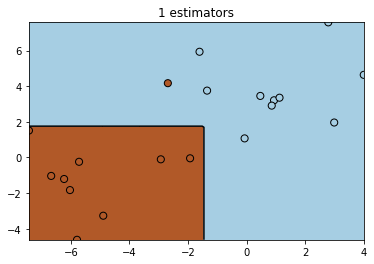

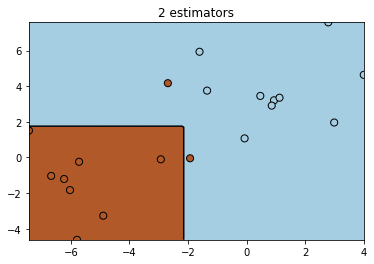

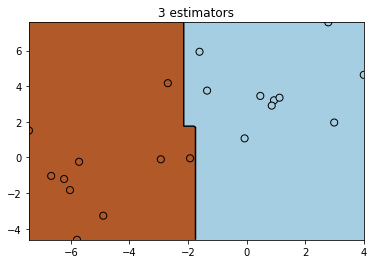

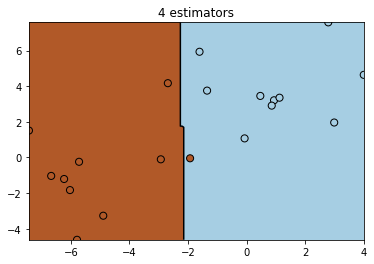

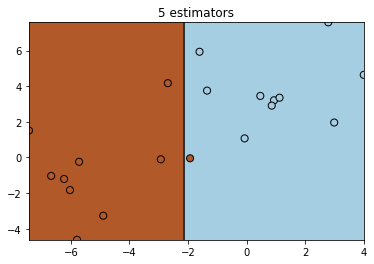

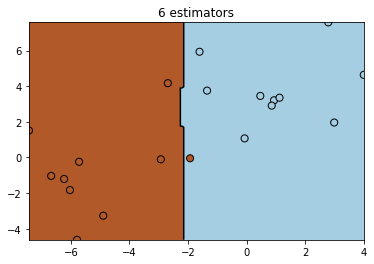

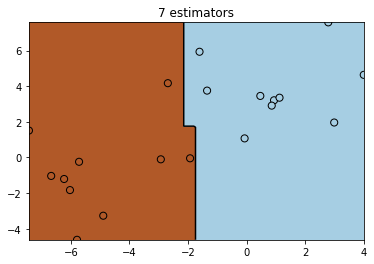

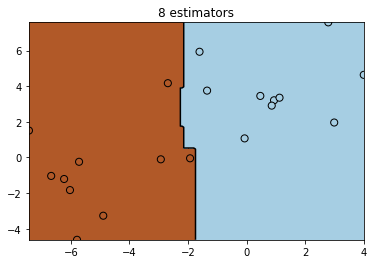

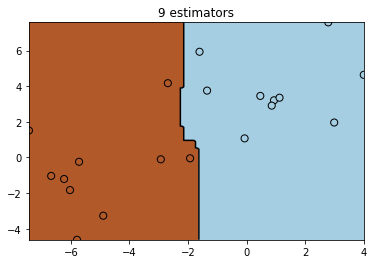

In [8]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state=8) # max_depth != 1

for i in range(1,10):
    clf.n_estimators=i
    clf.fit(X,y)
    plt.scatter(X[:, 0], X[:, 1], marker='o', s=50, c=y, edgecolors='k') # 2次元散布図でプロット
    plotBoundary(X, clf)
    plt.title("{0} estimators".format(i))
    plt.show()

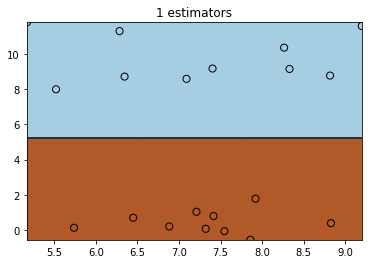

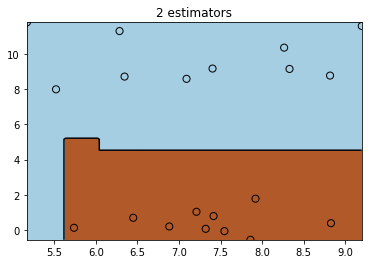

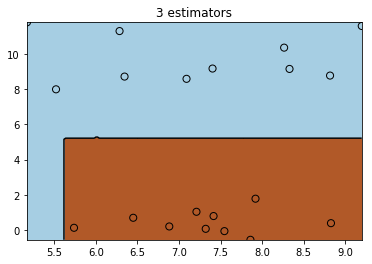

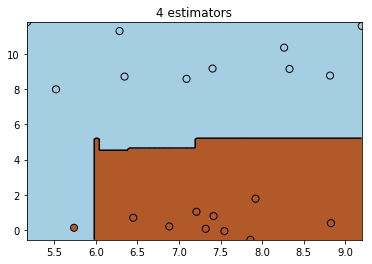

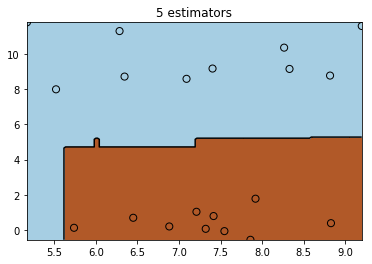

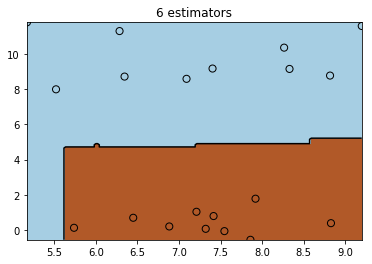

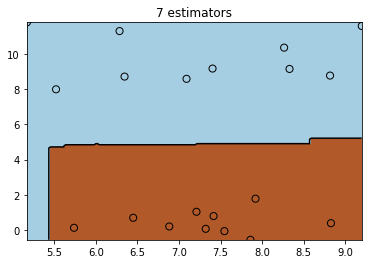

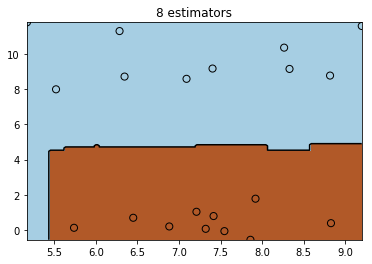

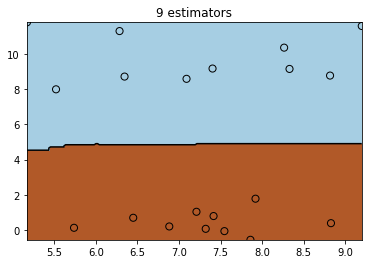

In [9]:
X, y = make_blobs(n_samples=20, # 20個生成
                  n_features=2, # 2次元
                  centers=2,    # クラスタ中心2個
                  cluster_std =1, # クラスタの大きさ（標準偏差）
                  random_state=8   # 乱数種（再現用）
                 )

for i in range(1,10):
    clf.n_estimators=i
    clf.fit(X,y)
    plt.scatter(X[:, 0], X[:, 1], marker='o', s=50, c=y, edgecolors='k') # 2次元散布図でプロット
    plotBoundary(X, clf)
    plt.title("{0} estimators".format(i))
    plt.show()

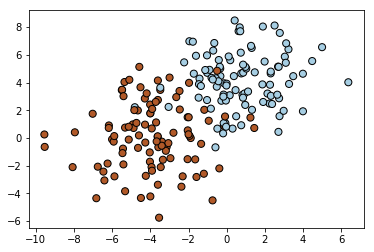

In [10]:
X, y = make_blobs(n_samples=200, # 20個生成
                  n_features=2, # 2次元
                  centers=2,    # クラスタ中心2個
                  cluster_std =2, # クラスタの大きさ（標準偏差）
                  random_state=3   # 乱数種（再現用）
                 )
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolors='k'); # 2次元散布図でプロット

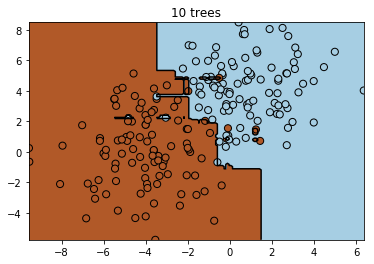

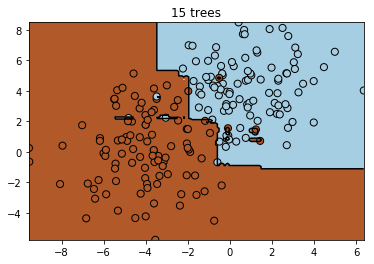

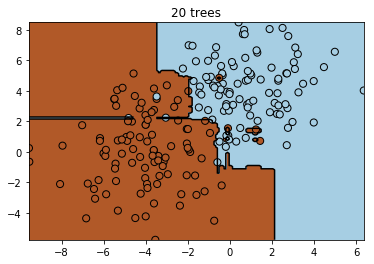

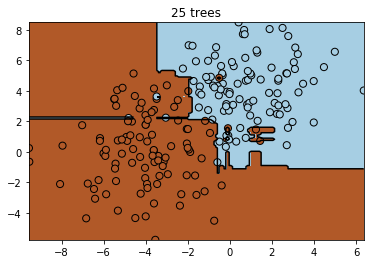

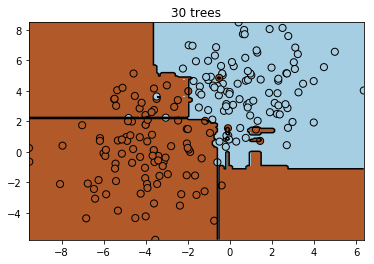

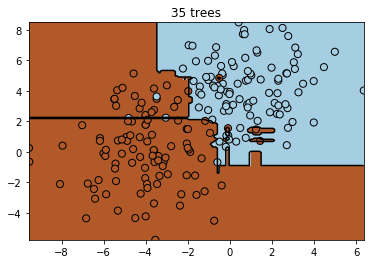

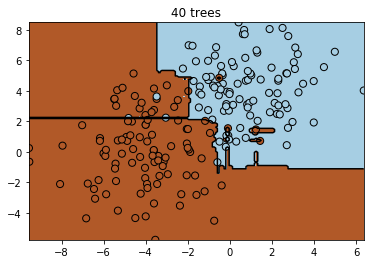

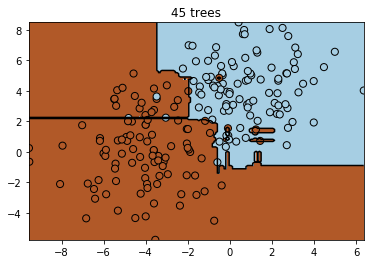

In [11]:


for n in range(10,50,5):
    clf.n_estimators = n
    clf.fit(X,y)
    plt.scatter(X[:, 0], X[:, 1], marker='o', s=50, c=y, edgecolors='k')
    plotBoundary(X, clf)
    plt.title("{0} trees".format(n))
    plt.show()

In [12]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
X = data.data
y = data.target

In [13]:
from sklearn.model_selection import ShuffleSplit
ss = ShuffleSplit(n_splits=1, 
                  train_size=0.8, 
                  test_size=0.2, 
                  random_state=0)

train_index, test_index = next(ss.split(X, y))

X_train, X_test = X[train_index], X[test_index]
y_train, y_test = y[train_index], y[test_index]

In [14]:
clf = RandomForestClassifier(random_state=8)

In [15]:
scores = []
n_range = range(1,100, 10)
for n in n_range:
    clf.n_estimators = n
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    print("{0} trees".format(n), score)
    scores.append(score)
scores = np.array(scores)

1 trees 0.885964912281
11 trees 0.973684210526
21 trees 0.973684210526
31 trees 0.982456140351
41 trees 0.982456140351
51 trees 0.973684210526
61 trees 0.973684210526
71 trees 0.973684210526
81 trees 0.973684210526
91 trees 0.973684210526


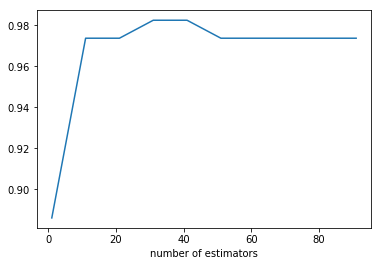

In [16]:
plt.plot(n_range, scores)
plt.xlabel("number of estimators")

In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scale = scaler.transform(X_train)
X_test_scale  = scaler.transform(X_test)

In [18]:
scores2 = []
n_range = range(1,100, 10)
for n in n_range:
    clf.n_estimators=n
    clf.fit(X_train_scale, y_train)
    score = clf.score(X_test_scale, y_test)
    print("{0} trees".format(n), score)
    scores2.append(score)
scores2 = np.array(scores2)

1 trees 0.885964912281
11 trees 0.973684210526
21 trees 0.973684210526
31 trees 0.982456140351
41 trees 0.982456140351
51 trees 0.973684210526
61 trees 0.973684210526
71 trees 0.973684210526
81 trees 0.973684210526
91 trees 0.973684210526


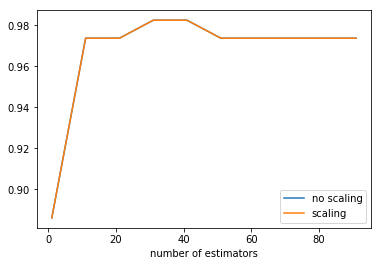

In [19]:
plt.plot(n_range, scores, label="no scaling")
plt.plot(n_range, scores2, label="scaling")
plt.xlabel("number of estimators")
plt.legend(loc="best")